<a href="https://colab.research.google.com/github/AyrllanP/PISI-3/blob/dev-2/Clusteriza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Verificando se existe valores nulos

In [ ]:
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/Dataset- Bem-estar/Wellbeing_and_lifestyle_data_Kaggle.csv",encoding="latin1")
print("Verificação de Valores Nulos")
print("Este dataset não contém valores nulos." if data.isnull().sum().sum() == 0 else "Este dataset contém valores nulos.")
print(data.isnull().sum())

Verificação de Valores Nulos
Este dataset não contém valores nulos.
ï»¿Timestamp               0
FRUITS_VEGGIES             0
DAILY_STRESS               0
PLACES_VISITED             0
CORE_CIRCLE                0
SUPPORTING_OTHERS          0
SOCIAL_NETWORK             0
ACHIEVEMENT                0
DONATION                   0
BMI_RANGE                  0
TODO_COMPLETED             0
FLOW                       0
DAILY_STEPS                0
LIVE_VISION                0
SLEEP_HOURS                0
LOST_VACATION              0
DAILY_SHOUTING             0
SUFFICIENT_INCOME          0
PERSONAL_AWARDS            0
TIME_FOR_PASSION           0
WEEKLY_MEDITATION          0
AGE                        0
GENDER                     0
WORK_LIFE_BALANCE_SCORE    0
dtype: int64


# Quantidade de Registros e Colunas

In [ ]:
print("Quantidade de Colunas e Registros")
print(f"O dataset possui {data.shape[0]} registros e {data.shape[1]} colunas.")

Quantidade de Colunas e Registros
O dataset possui 15972 registros e 24 colunas.


# Identificar Colunas Categóricas e Numericas

In [ ]:
categoricas = data.select_dtypes(include=['object', 'category']).columns.tolist()
numericas = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

from IPython.display import display, Markdown

display(Markdown("### Colunas Categóricas e Numéricas"))
display(Markdown(f"**Colunas Categóricas:** {categoricas}"))
display(Markdown(f"**Colunas Numéricas:** {numericas}"))



### Colunas Categóricas e Numéricas

**Colunas Categóricas:** ['ï»¿Timestamp', 'DAILY_STRESS', 'AGE', 'GENDER']

**Colunas Numéricas:** ['FRUITS_VEGGIES', 'PLACES_VISITED', 'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS', 'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING', 'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'WORK_LIFE_BALANCE_SCORE']



---
# Função para detectar e tratar outliers com base no intervalo interquartil (IQR)



In [ ]:

def tratar_outliers(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]
    print(f"Coluna: {coluna} - Outliers detectados: {len(outliers)}")

    mediana = df[coluna].median()
    df.loc[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior), coluna] = mediana

colunas_com_outliers = ['SLEEP_HOURS', 'DAILY_SHOUTING', 'WORK_LIFE_BALANCE_SCORE']

for coluna in colunas_com_outliers:
    tratar_outliers(data, coluna)

print("Limpeza de dados concluída. O dataset tratado está armazenado na variável 'data'.")


Coluna: SLEEP_HOURS - Outliers detectados: 39
Coluna: DAILY_SHOUTING - Outliers detectados: 930
Coluna: WORK_LIFE_BALANCE_SCORE - Outliers detectados: 71
Limpeza de dados concluída. O dataset tratado está armazenado na variável 'data'.


# Codificando dados categóricos: OneHot Encoding e Label Encoding

In [ ]:

df = data.copy()

categorical_columns = ['Timestamp', 'DAILY_STRESS', 'AGE', 'GENDER']

df = pd.get_dummies(df, columns=['GENDER', 'AGE'], drop_first=True)

def encode_daily_stress(value):
    mapping = {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5}
    return mapping.get(value, -1)

df['DAILY_STRESS'] = df['DAILY_STRESS'].apply(encode_daily_stress)

if 'Timestamp' in df.columns:
    df.drop(columns=['Timestamp'], inplace=True)

print("Codificação concluída. O dataset processado está armazenado na variável 'df'.")










Codificação concluída. O dataset processado está armazenado na variável 'df'.


# Redução dimensional e separação da amostragem

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

data = df.copy()


features = ['SLEEP_HOURS', 'DAILY_SHOUTING', 'WORK_LIFE_BALANCE_SCORE', 'DAILY_STRESS','FRUITS_VEGGIES', 'PLACES_VISITED', 'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION','LIVE_VISION','LOST_VACATION', 'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'WEEKLY_MEDITATION']
data_features = data[features]

# Separação de amostra para economizar memória
sample_data, _ = train_test_split(data_features, train_size=0.01, random_state=42)

# 3. Redução de dimensionalidade
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(sample_data)

# Utilizando a curva de Elbow com a lógica WCSS

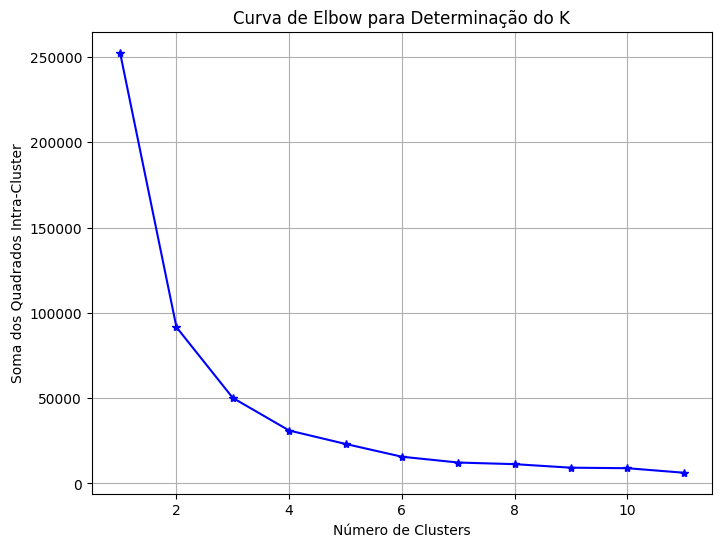

In [ ]:
# 4. Determinação do melhor número de clusters (Curva de Elbow)
k_range = range(1, 12)
k_means_var = [KMeans(n_clusters=k, random_state=42).fit(reduced_data) for k in k_range]

# Calculando a soma dos quadrados intra-cluster e inter-cluster
centroids = [model.cluster_centers_ for model in k_means_var]
k_euclid = [cdist(reduced_data, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis=1) for ke in k_euclid]
soma_quadrados_intra_cluster = [sum(d**2) for d in dist]

# Curva de Elbow
plt.figure(figsize=(8, 6))
plt.plot(k_range, soma_quadrados_intra_cluster, 'b*-')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma dos Quadrados Intra-Cluster')
plt.title('Curva de Elbow para Determinação do K')
plt.grid(True)
plt.show()

# Criando o modelo K-Means com o K ótimo

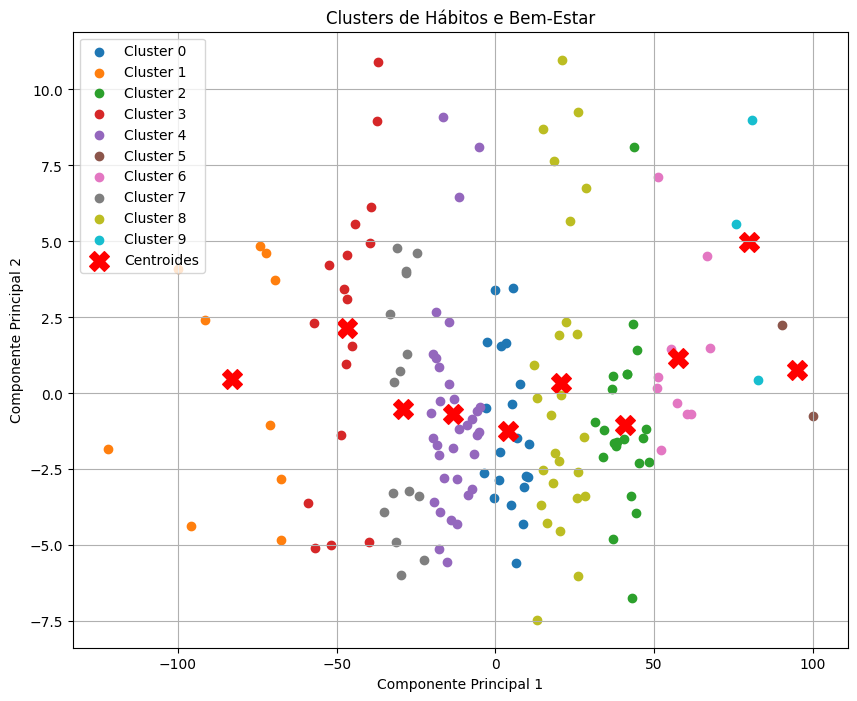

In [ ]:
# 5. Criar o modelo K-Means com o K ótimo (assuma K=3 para este exemplo)
k_optimo = 10  # Ajuste com base na Curva de Elbow
modelo_kmeans = KMeans(n_clusters=k_optimo, random_state=42)
clusters = modelo_kmeans.fit_predict(reduced_data)

# Adicionando os clusters aos dados originais
sample_data['Cluster'] = clusters

# 6. Visualização dos clusters
plt.figure(figsize=(10, 8))
for cluster in range(k_optimo):
    cluster_data = reduced_data[clusters == cluster]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster}')

plt.scatter(modelo_kmeans.cluster_centers_[:, 0], modelo_kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroides')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters de Hábitos e Bem-Estar')
plt.legend()
plt.grid(True)
plt.show()

# Análise dos Clusters

In [ ]:
cluster_summary = sample_data.groupby('Cluster')[features].mean()
print("Média dos hábitos por cluster:")
print(cluster_summary)

bem_estar = 'WORK_LIFE_BALANCE_SCORE'
for cluster in range(k_optimo):
    cluster_mean = sample_data[sample_data['Cluster'] == cluster][bem_estar].mean()
    print(f"Cluster {cluster}: Média do bem-estar = {cluster_mean:.2f}")


Média dos hábitos por cluster:
         SLEEP_HOURS  DAILY_SHOUTING  WORK_LIFE_BALANCE_SCORE  DAILY_STRESS  \
Cluster                                                                       
0           7.150000        2.100000               673.480000      2.750000   
1           6.800000        3.700000               586.540000      3.400000   
2           7.227273        1.454545               709.913636      2.000000   
3           6.470588        3.882353               622.752941      3.117647   
4           6.941176        2.588235               656.167647      3.147059   
5           8.000000        1.000000               763.850000      1.500000   
6           7.100000        1.800000               726.440000      2.700000   
7           6.933333        2.666667               640.326667      3.000000   
8           6.923077        2.576923               689.850000      2.769231   
9           7.000000        3.333333               748.700000      3.000000   

         FRUITS_VEGG